# <center>  Flight Price Prediction 

Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

import sklearn


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import RandomizedSearchCV , train_test_split


import pickle

Importing  Dataset

In [2]:

flight_data = pd.read_excel(r"D:\Flight-Price-Prediction\air_train.xlsx",engine='openpyxl')


#### EDA

DataFrame Visualization

In [3]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


 Dataset Size

In [4]:
flight_data.shape

(10683, 11)

Dataset Data Types

In [5]:
 flight_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Frequency Of Data Types

In [6]:
flight_data.dtypes.value_counts()

object    10
int64      1
dtype: int64

Unique Values In Each Column

In [7]:
flight_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Statistical Description Of The Entire Dataset Including Categorical Columns

In [8]:
flight_data.describe(include=['O']).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


Checking Null Values

In [9]:
flight_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Dropping Null Values

In [10]:
flight_data.dropna(inplace=True)

In [11]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Price Distribution

C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\3093454727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flight_data['Price'])


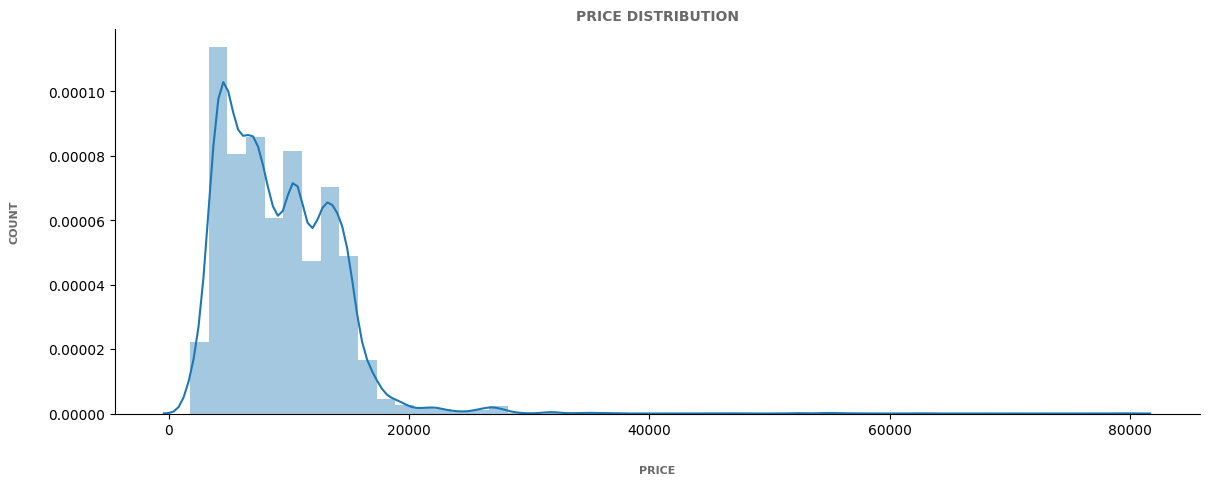

In [12]:
plt.figure(figsize = (14,5))
sns.distplot(flight_data['Price'])
sns.despine()
plt.title('PRICE DISTRIBUTION', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8);


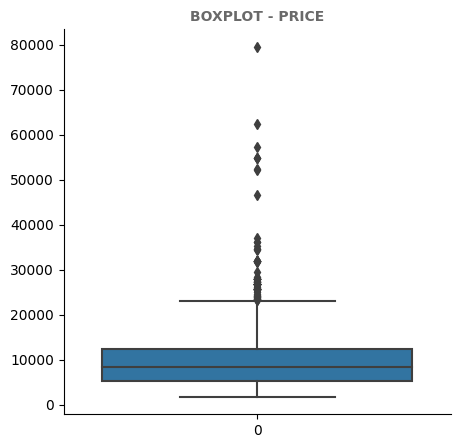

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(flight_data['Price'])
sns.despine()
plt.title('BOXPLOT - PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.show()

Airline Distribution

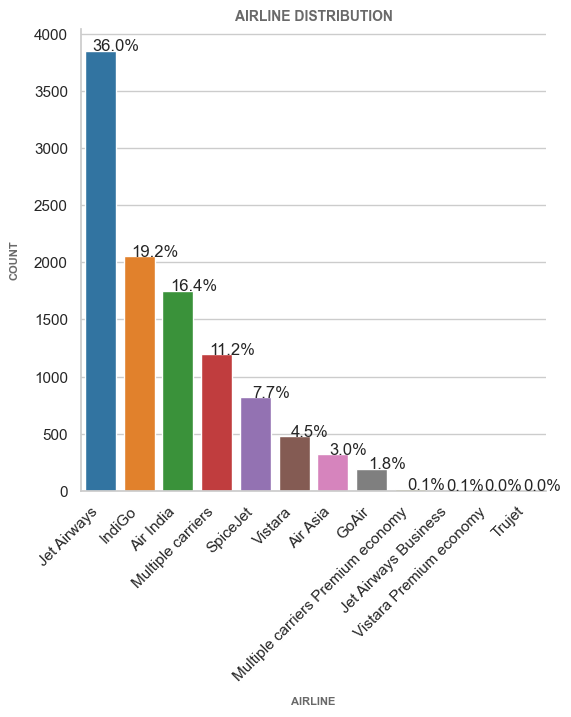

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))

total = float(flight_data.shape[0])

ax = sns.countplot(x='Airline', data=flight_data, palette='tab10', order = flight_data['Airline'].value_counts().index)
sns.despine()
plt.title('AIRLINE DISTRIBUTION', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('AIRLINE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8);
plt.xticks(rotation=45, ha='right')
plt.show()

Average Price vs Airline Graph

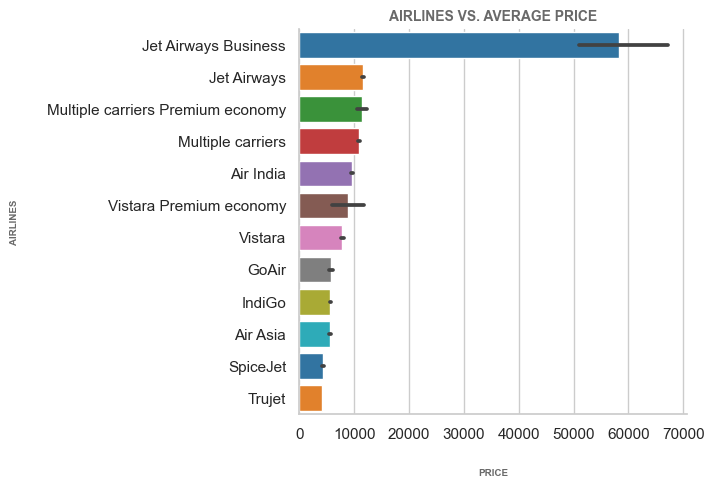

In [15]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'Price', y = 'Airline', orient = "h", data=flight_data, palette = "tab10", order = flight_data.groupby(["Airline"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('AIRLINES VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('AIRLINES', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Source Distribution

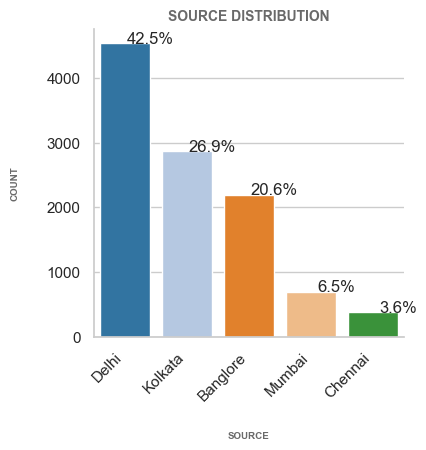

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))

total = float(flight_data.shape[0])

ax = sns.countplot(x='Source', data=flight_data, palette='tab20', order = flight_data['Source'].value_counts().index)
sns.despine()
plt.title('SOURCE DISTRIBUTION', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('SOURCE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

 Average Price vs Source

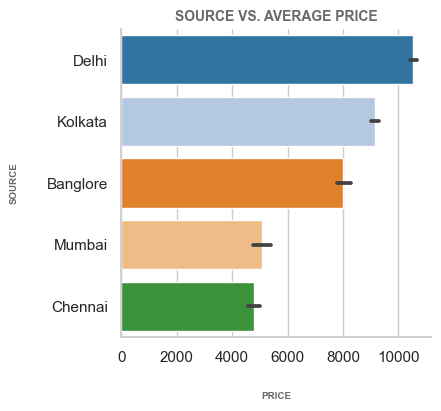

In [17]:
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Source', orient = "h", data=flight_data, palette = "tab20", order = flight_data.groupby(["Source"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('SOURCE VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('SOURCE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Destination Distribution Graph

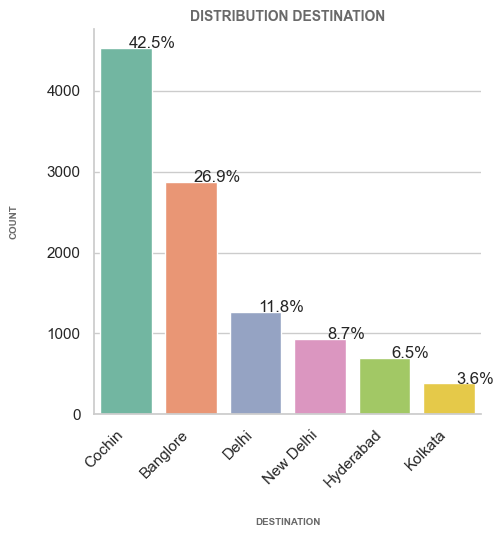

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))

total = float(flight_data.shape[0])

ax = sns.countplot(x='Destination', data=flight_data, palette='Set2', order = flight_data['Destination'].value_counts().index)
sns.despine()
plt.title('DISTRIBUTION DESTINATION', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('DESTINATION', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

Total_Stops Distribution Graph


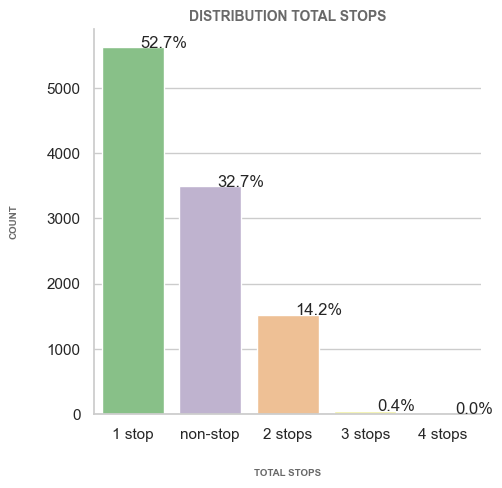

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))

total = float(flight_data.shape[0])

ax = sns.countplot(x='Total_Stops', data=flight_data, palette='Accent', order = flight_data['Total_Stops'].value_counts().index)
sns.despine()
plt.title('DISTRIBUTION TOTAL STOPS', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('TOTAL STOPS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

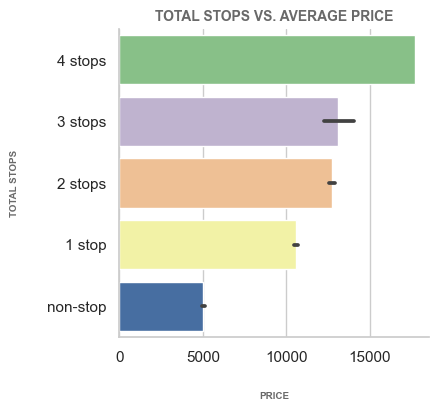

In [20]:
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Total_Stops', orient = "h", data=flight_data, palette = "Accent", order = flight_data.groupby(["Total_Stops"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('TOTAL STOPS VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('TOTAL STOPS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Additional_Info Distribution Graph

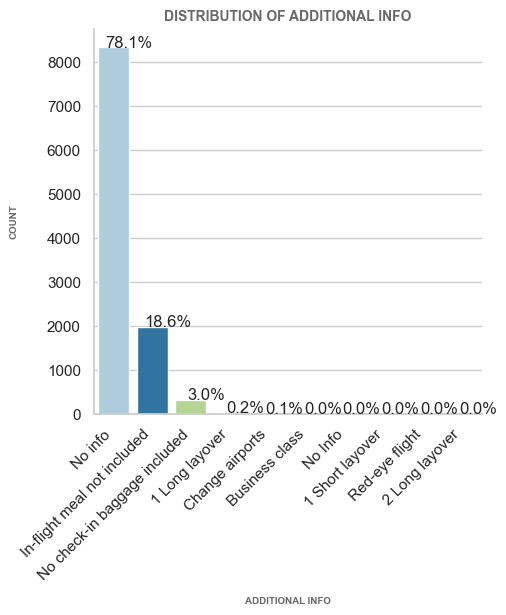

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))

total = float(flight_data.shape[0])

ax = sns.countplot(x='Additional_Info', data=flight_data, palette='Paired', order = flight_data['Additional_Info'].value_counts().index)
sns.despine()
plt.title('DISTRIBUTION OF ADDITIONAL INFO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('ADDITIONAL INFO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

- **SOME CONCLUSIONS :**

Most prices are in a range of up to 20000, but outliers are present.

Jet Airways is the most frequent airline. However, Jet Airways Business has an average price much higher than the other lines.

Delhi is where most flights depart from and has the highest average price.

Cochin is the destination with the highest number of flights. However, New Delhi is the destination with the highest average price.

A little more than half of the flights have only one stop and the greater the number of stops, the higher the average price.

In the information column, the vast majority do not contain information and the rest are not relevant to the model.

#### Preprocessing

In [22]:
#Converting string values in columns "Date_of_Journey", "Dep_Time" and"Arrival_Time" to Datetime



flight_data["Journey_month"] = pd.to_datetime(flight_data["Date_of_Journey"]).dt.month
flight_data["Journey_day"] = pd.to_datetime(flight_data["Date_of_Journey"]).dt.day

flight_data["Dep_Time_hr"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour
flight_data["Dep_Time_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

flight_data["Arrival_Time_hr"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.hour
flight_data["Arrival_Time_min"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.minute

C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\1030608300.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data["Journey_month"] = pd.to_datetime(flight_data["Date_of_Journey"]).dt.month
C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\1030608300.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data["Journey_day"] = pd.to_datetime(flight_data["Date_of_Journey"]).dt.day


Dropping Insignificant Columns From The  Dataset

In [23]:
flight_data.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)

Converting Categorical Features Into Numerical Form Using LabelEncoder()

In [24]:
le = LabelEncoder()

flight_data["Source"] = le.fit_transform(flight_data["Source"])
flight_data["Destination"] = le.fit_transform(flight_data["Destination"])

Determining No. Of Flights For Different Airline Companies 

In [25]:
print(flight_data.Airline.value_counts())  

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Mapping No. Of Stops For  Dataset

In [26]:
stop = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

flight_data.loc[: , "Total_Stops"] = flight_data["Total_Stops"].map(stop)  


C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\3861106980.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  flight_data.loc[: , "Total_Stops"] = flight_data["Total_Stops"].map(stop)


Change Of Duration Into Hrs. And Min.

In [27]:
duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [28]:
flight_data["Duration_hours"] = duration_hours
flight_data["Duration_mins"] = duration_mins

In [29]:
flight_data.sample(8)  

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
1496,Air India,2,1,37h 20m,2,8446,3,27,5,55,19,15,37,20
7879,Air India,3,0,17h 25m,2,11516,1,4,5,50,23,15,17,25
6118,IndiGo,3,0,2h 30m,0,4174,12,4,15,15,17,45,2,30
5560,Air India,2,1,12h 45m,1,7480,6,24,20,40,9,25,12,45
8894,Vistara,2,1,3h 10m,0,12411,6,3,6,0,9,10,3,10
3855,Jet Airways,0,2,2h 45m,0,7229,5,18,6,0,8,45,2,45
1133,Jet Airways,3,0,9h 50m,1,10844,5,15,8,25,18,15,9,50
10476,Jet Airways,2,1,13h 25m,1,6017,3,21,15,0,4,25,13,25


In [30]:
# Dropping the "Duration" column from the  dataset as it is irrelevant now

flight_data.drop(["Duration"] , axis =1 , inplace =True)


Airline Column

In [31]:
flight_data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [32]:
flight_data.Airline.value_counts() 

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [33]:
# mapping

stop = {
    "Jet Airways":1,
    "IndiGo":2,
    "Air India":3,
    "Multiple carriers":4,
    "SpiceJet":5 , "Vistara":6 ,"Air Asia":7 , "GoAir":8, 
}

flight_data.loc[: , "Airline"] = flight_data["Airline"].map(stop)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\143760837.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  flight_data.loc[: , "Airline"] = flight_data["Airline"].map(stop)


In [34]:
for name in stop.values():
    print(name)

1
2
3
4
5
6
7
8


In [35]:
flight_data = flight_data[flight_data.Airline != 'Trujet']

flight_data = flight_data[flight_data.Airline != 'Multiple carriers Premium economy']
flight_data = flight_data[flight_data.Airline != 'Jet Airways Business']
flight_data = flight_data[flight_data.Airline != 'Vistara Premium economy']

In [36]:
flight_data.Airline.value_counts()

1.0    3849
2.0    2053
3.0    1751
4.0    1196
5.0     818
6.0     479
7.0     319
8.0     194
Name: Airline, dtype: int64

In [37]:
flight_data.isnull().sum()

Airline             23
Source               0
Destination          0
Total_Stops          0
Price                0
Journey_month        0
Journey_day          0
Dep_Time_hr          0
Dep_Time_min         0
Arrival_Time_hr      0
Arrival_Time_min     0
Duration_hours       0
Duration_mins        0
dtype: int64

In [38]:
flight_data.dropna(inplace = True)

In [39]:
flight_data.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

Checking Correlation Between Columns

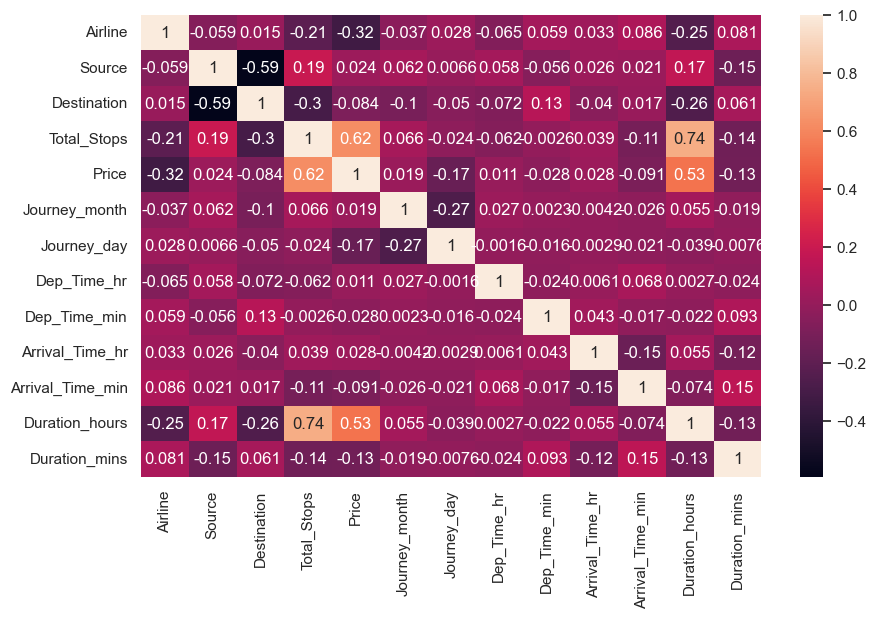

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(flight_data.corr(),annot=True);

In [41]:
X = flight_data.drop(["Price"] , axis =1)
y = flight_data.Price
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 100 , test_size = 0.15)

#### Feature Selection¶

In [43]:
feat = ExtraTreesRegressor()
feat.fit(X_train , y_train)

ExtraTreesRegressor()

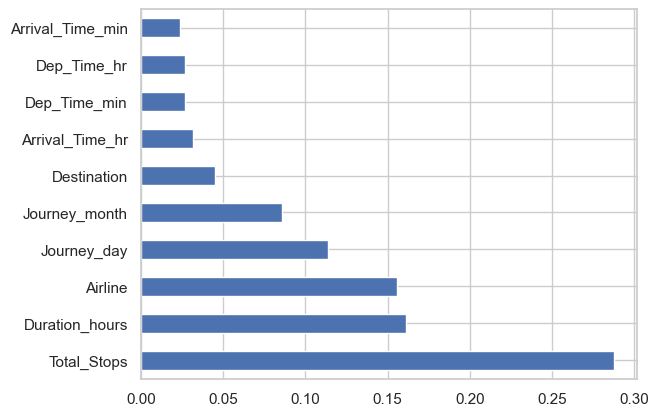

In [44]:
features = pd.Series( feat.feature_importances_ , index = X_train.columns )
features.nlargest(10).plot(kind = "barh")
plt.show()

From the plot above, we can clearly see that the feature **Total_Stops** has the highest importance.

In [45]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10659 non-null  float64
 1   Source            10659 non-null  int32  
 2   Destination       10659 non-null  int32  
 3   Total_Stops       10659 non-null  int64  
 4   Price             10659 non-null  int64  
 5   Journey_month     10659 non-null  int64  
 6   Journey_day       10659 non-null  int64  
 7   Dep_Time_hr       10659 non-null  int64  
 8   Dep_Time_min      10659 non-null  int64  
 9   Arrival_Time_hr   10659 non-null  int64  
 10  Arrival_Time_min  10659 non-null  int64  
 11  Duration_hours    10659 non-null  int64  
 12  Duration_mins     10659 non-null  int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 1.1 MB


In [46]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))

models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

# Evaluating each model in a loop 

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: total: 40.9 s
Wall time: 32.9 s


,Model,Mean,STD
3,XGBRegressor,84.041132,2.952773
2,RandomForestRegressor,81.662190,2.753978
4,DecisionTreeRegressor,71.372529,4.076396
1,KNeighborsRegressor,61.231332,4.086348
0,LinearRegression,48.363944,2.931298


Boxplot To Compare The Algorithms

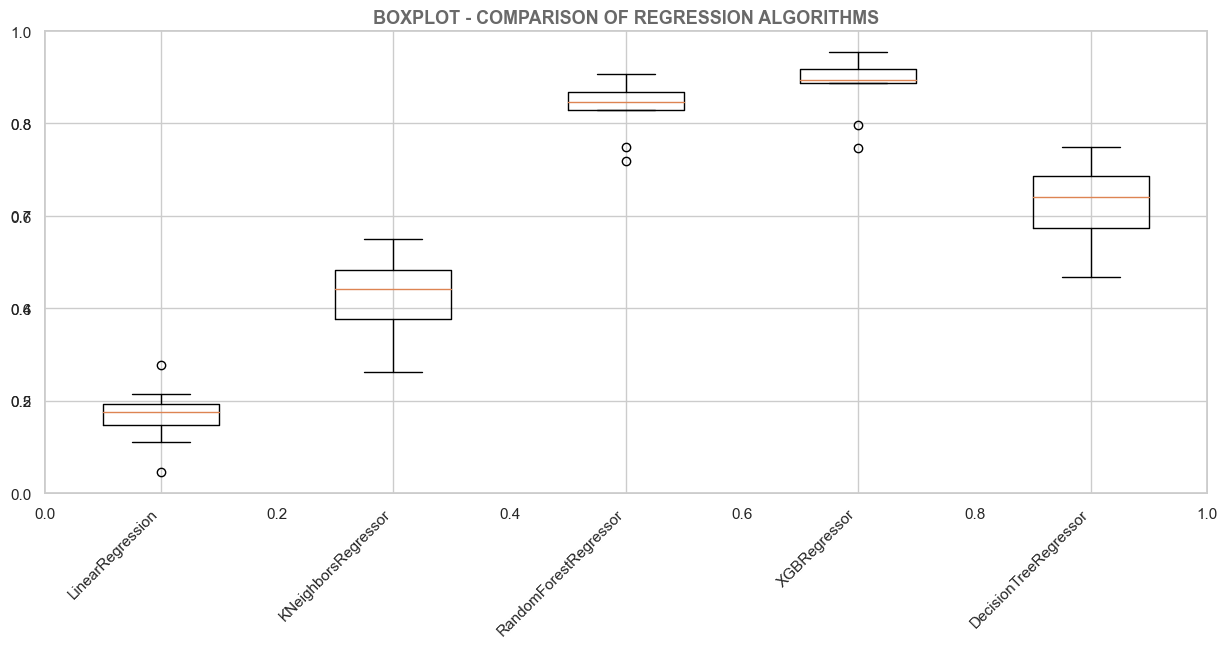

In [47]:
fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha='right')
plt.show()

NOTE: Tree-based methods such as Bagging, Random Forests and Boosting do not require the data to be normalized or standardized. However, the LinearRegression, KNeighborsRegressor and SVR algorithms considerably improve their result with normalized or standardized data. In view of this, we will evaluate these algorithms with normalized and standardized data and verify if they surpass the results of tree-based algorithms.

Normalized Data

In [48]:
num_cols = X_train.columns

X_train_norm = X_train.copy()

normalization = MinMaxScaler()

In [49]:
X_train_norm[num_cols] = normalization.fit_transform(X_train[num_cols])

In [50]:
pd.DataFrame(X_train_norm)

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
2061,0.142857,0.50,0.2,0.25,0.727273,0.125000,0.391304,0.272727,0.913043,0.000000,0.234043,0.818182
1703,0.142857,0.00,1.0,0.00,0.181818,0.500000,0.695652,1.000000,0.826087,0.818182,0.042553,0.909091
3375,0.000000,0.75,0.0,0.25,0.363636,0.500000,0.391304,0.636364,0.434783,1.000000,0.531915,0.363636
8432,0.857143,0.75,0.0,0.00,0.181818,0.125000,0.434783,0.363636,0.521739,1.000000,0.042553,0.636364
2696,0.142857,1.00,0.6,0.00,1.000000,0.125000,0.521739,0.000000,0.565217,0.545455,0.021277,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.00,0.4,0.00,0.272727,1.000000,0.260870,0.000000,0.347826,0.818182,0.042553,0.818182
79,0.571429,0.25,0.8,0.00,0.181818,0.750000,0.347826,0.363636,0.434783,0.636364,0.042553,0.272727
8057,0.142857,0.00,0.4,0.00,0.727273,0.041667,0.956522,0.181818,0.043478,0.000000,0.042553,0.909091
6952,0.142857,0.75,0.0,0.25,0.727273,0.125000,0.652174,0.181818,0.869565,0.545455,0.106383,0.363636


Statistical Summary of Normalized Data

In [51]:
X_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,9060.0,0.241643,0.260042,0.0,0.000000,0.142857,0.428571,1.0
Source,9060.0,0.488990,0.295580,0.0,0.500000,0.500000,0.750000,1.0
Destination,9060.0,0.288411,0.296862,0.0,0.000000,0.200000,0.400000,1.0
Total_Stops,9060.0,0.204498,0.168491,0.0,0.000000,0.250000,0.250000,1.0
Journey_month,9060.0,0.413375,0.272831,0.0,0.181818,0.363636,0.454545,1.0
Journey_day,9060.0,0.401205,0.366247,0.0,0.083333,0.125000,0.750000,1.0
Dep_Time_hr,9060.0,0.543992,0.250699,0.0,0.347826,0.478261,0.782609,1.0
Dep_Time_min,9060.0,0.444461,0.341101,0.0,0.090909,0.454545,0.727273,1.0
Arrival_Time_hr,9060.0,0.578914,0.298576,0.0,0.347826,0.608696,0.826087,1.0
Arrival_Time_min,9060.0,0.449318,0.299873,0.0,0.181818,0.454545,0.636364,1.0


Boxplot Of Normalized Data

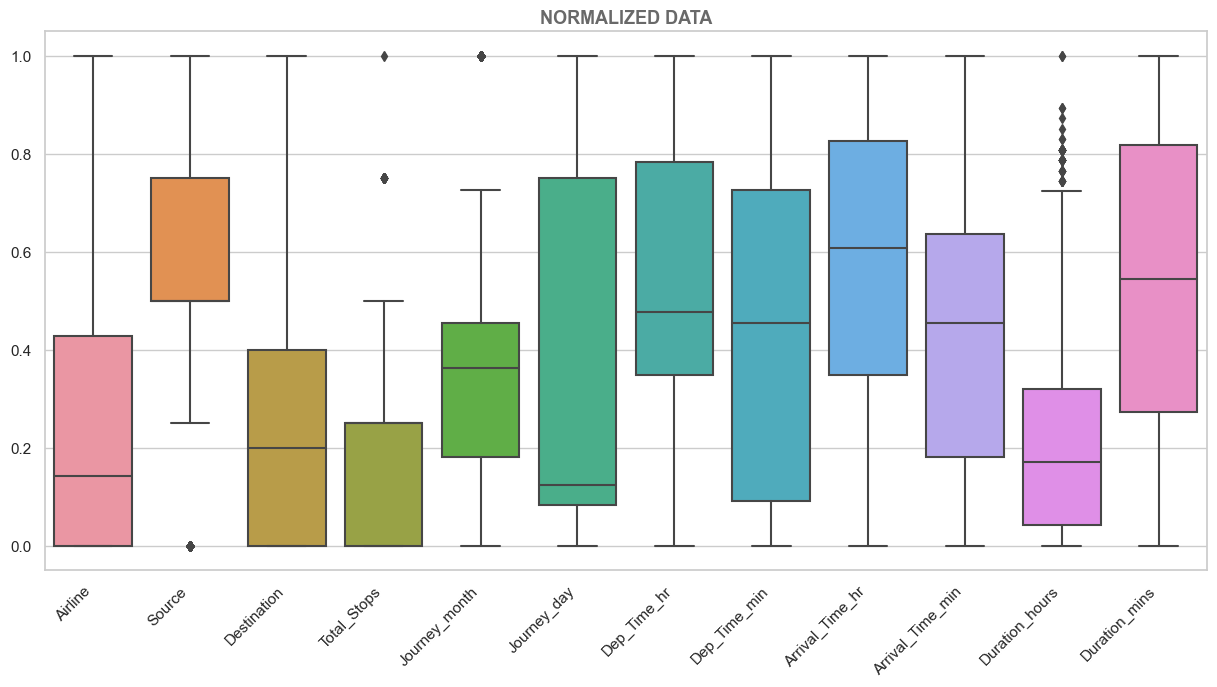

In [52]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_train_norm[num_cols])
plt.xticks(rotation=45, ha='right')
plt.title('NORMALIZED DATA', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.show();

In [53]:
X_train_norm = pd.DataFrame(X_train_norm)

In [54]:
%%time

# Predictive Model Selection

# Defining values for the number of folds

num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))

# Evaluating each model in a loop

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_norm, y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: total: 906 ms
Wall time: 1.13 s


,Model,Mean,STD
1,KNeighborsRegressor,68.980293,3.396658
0,LinearRegression,48.363944,2.931298


Boxplot To Compare The Algorithms

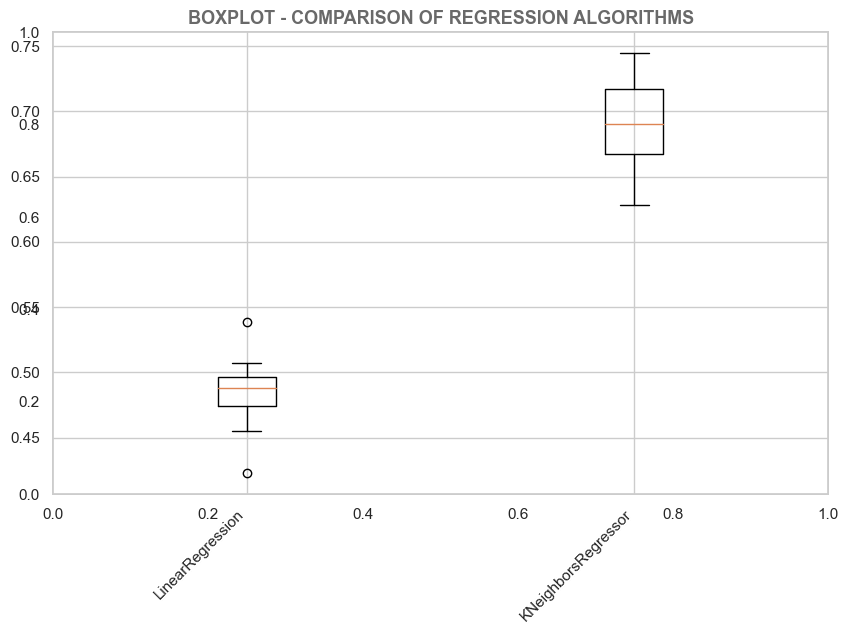

In [55]:
fig = plt.figure(figsize = (10,6))
plt.title('BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha='right')
plt.show()

Standardized Data

In [56]:

X_train_padr = X_train.copy()  # Copy of the DataFrame

standardization = StandardScaler()   # Standardizer

X_train_padr[num_cols] = standardization.fit_transform(X_train[num_cols])   # Applynig the Standardization

Statistical Summary Of Standardized Data

In [57]:
X_train_padr.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,9060.0,-1.882232e-17,1.000055,-0.929297,-0.929297,-0.379905,0.718879,2.916447
Source,9060.0,3.137054e-18,1.000055,-1.654430,0.037251,0.037251,0.883091,1.728932
Destination,9060.0,-7.979881e-17,1.000055,-0.971584,-0.971584,-0.297834,0.375917,2.397170
Total_Stops,9060.0,-7.440700e-17,1.000055,-1.213766,-1.213766,0.270071,0.270071,4.721582
Journey_month,9060.0,7.058372e-17,1.000055,-1.515219,-0.848768,-0.182318,0.150908,2.150260
Journey_day,9060.0,-8.156340e-17,1.000055,-1.095509,-0.867964,-0.754191,0.952402,1.635038
Dep_Time_hr,9060.0,-7.881848e-17,1.000055,-2.170022,-0.782519,-0.262205,0.951860,1.819050
Dep_Time_min,9060.0,-7.685782e-17,1.000055,-1.303092,-1.036560,0.029566,0.829160,1.628755
Arrival_Time_hr,9060.0,3.293907e-17,1.000055,-1.939021,-0.774007,0.099753,0.827886,1.410393
Arrival_Time_min,9060.0,8.783751e-17,1.000055,-1.498442,-0.892092,0.017434,0.623785,1.836486


Boxplot Of Standardized Data

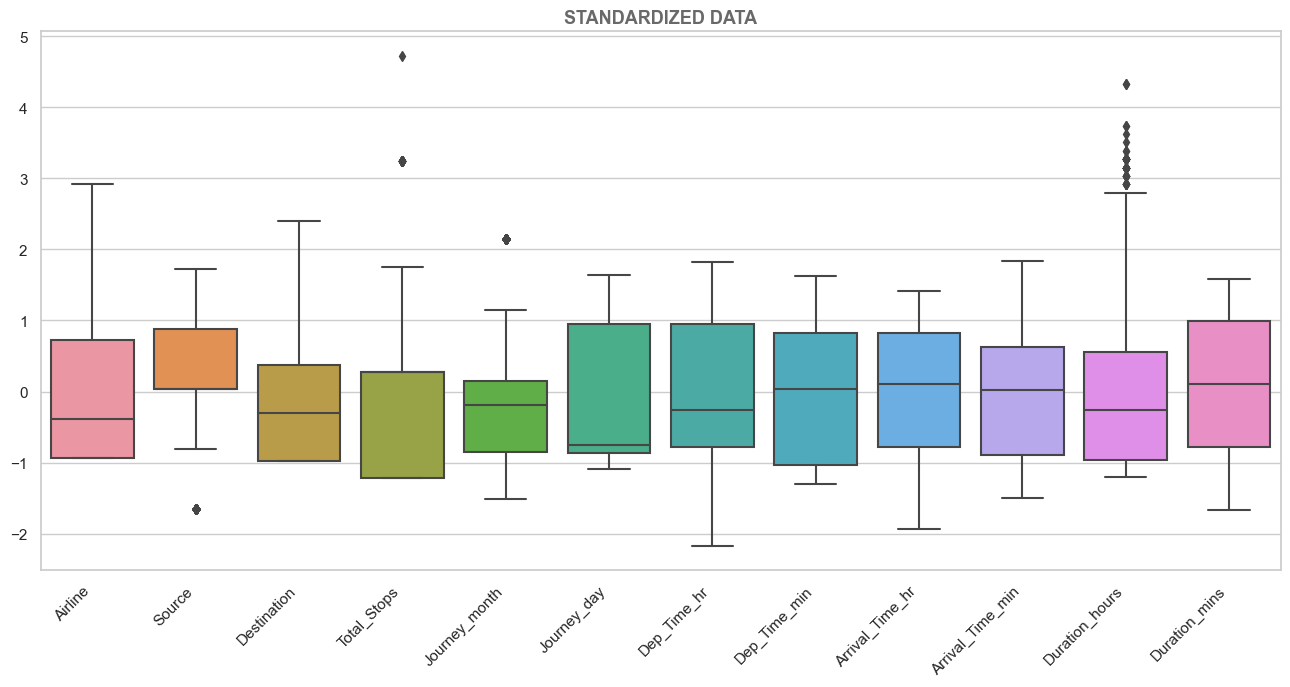

In [58]:
plt.figure(figsize=(16,7))
ax = sns.boxplot(data=X_train_padr[num_cols])
plt.xticks(rotation=45, ha='right')
plt.title('STANDARDIZED DATA', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.show()

Creation O DataFrame With Standardized Data

In [59]:
 X_train_padr = pd.DataFrame(X_train_padr)

In [60]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))

# Evaluating each model in a loop 

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_padr, y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)


CPU times: total: 875 ms
Wall time: 1.07 s


,Model,Mean,STD
1,KNeighborsRegressor,69.904093,3.488076
0,LinearRegression,48.363944,2.931298


Boxplot To Compare The Algorithms

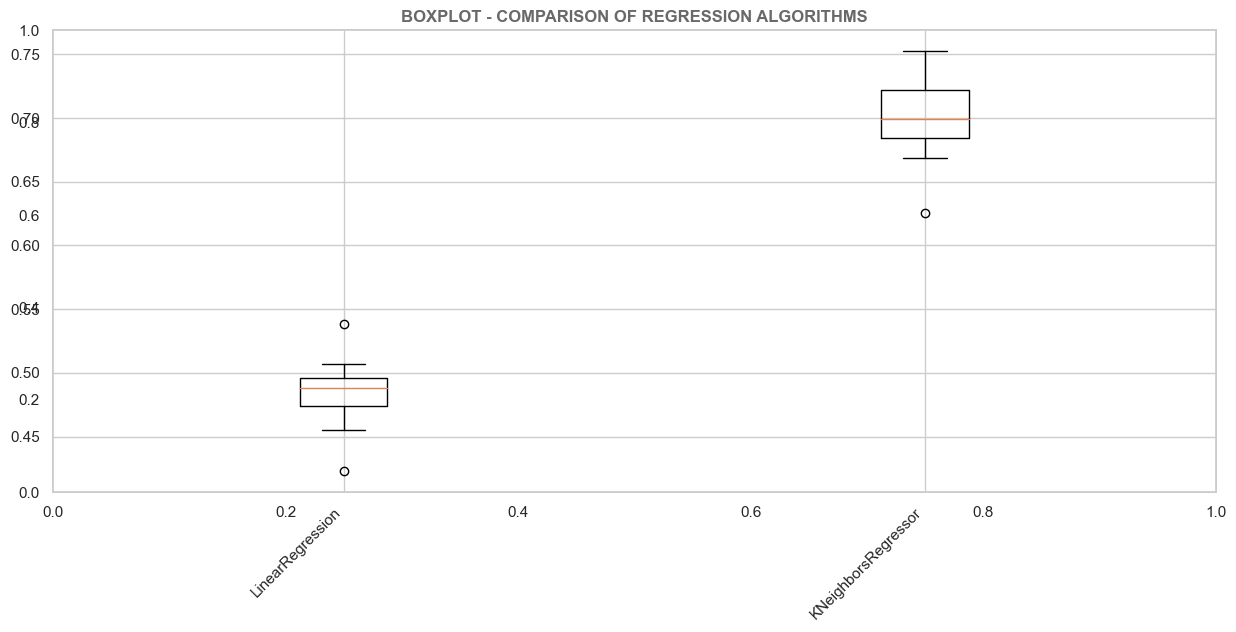

In [61]:
fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS', fontsize = 12, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha='right')
plt.show();

- **Conclusion**: We tested algorithms that are not based on trees like KNeighborsRegressor, LinearRegression and SVR on normalized and standardized data and obtained an improvement in the results in both cases. However, tree-based models still showed the best results.
We will choose the  best models evaluated through Cross Validation to apply hyperparameter tuning.

Comparison Of The Best Models Evaluated By Cross Validation

In [62]:
%%time

# Evaluation of Predictive Models

# Metrics

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []


# List of models

models = []

models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

models.append(('RandomForestRegressor', RandomForestRegressor()))

models.append(('XGBRegressor', XGBRegressor()))

# Evaluating each model in a loop

names = []

for name, model in models:

    model.fit(X_train, y_train)
    
    pred = model.predict(X_train)

    RSquared1.append(metrics.r2_score(y_train, pred)*100)
    MAE1.append(metrics.mean_absolute_error(y_train, pred))
    MSE1.append(metrics.mean_squared_error(y_train, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(y_train, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(y_train, pred)*100)
    names.append(name)
    
# Results
    
model_resul = pd.DataFrame({
    'Model': names,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

CPU times: total: 4.52 s
Wall time: 3.38 s


,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,DecisionTreeRegressor,96.593211,335.834115,6.642690e+05,815.027005,3.569616
1,RandomForestRegressor,95.278542,569.799984,9.206082e+05,959.483313,6.250750
2,XGBRegressor,93.407861,779.492101,1.285361e+06,1133.737520,9.070100


In [63]:
%%time

# Evaluation of Predictive Models

# Metrics

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []

# List of models

models = []

models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

models.append(('RandomForestRegressor', RandomForestRegressor()))

models.append(('XGBRegressor', XGBRegressor()))

# Evaluating each model in a loop

names = []

for name, model in models:

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)

    RSquared1.append(metrics.r2_score(y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(y_test, pred))
    MSE1.append(metrics.mean_squared_error(y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(y_test, pred)*100)
    names.append(name)
    
# Results
    
model_resul = pd.DataFrame({
    'Model': names,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

CPU times: total: 4.12 s
Wall time: 4.19 s


,Model,R-Squared,MAE,MSE,RMSE,MAPE
2,XGBRegressor,77.801312,1211.119592,4.863924e+06,2205.430524,13.231652
1,RandomForestRegressor,74.306528,1241.595774,5.629661e+06,2372.690717,13.610727
0,DecisionTreeRegressor,60.787975,1452.563821,8.591693e+06,2931.158943,15.838698


Checking Distribution On The Train Dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\2371463114.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfr.predict(X_train) - y_train);


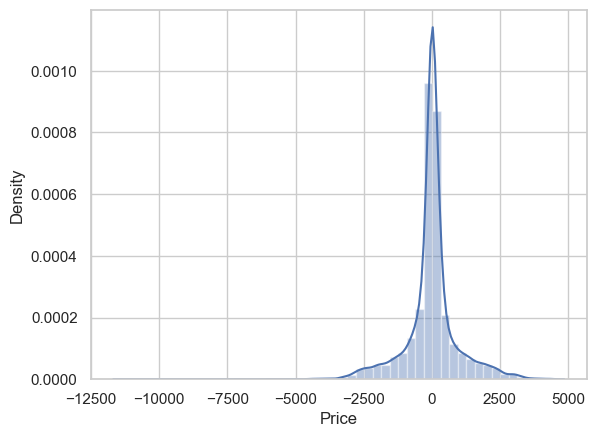

In [64]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)
sns.distplot(rfr.predict(X_train) - y_train);

In [65]:
rfr.score(X_train,y_train)

0.953033784283785

In [66]:
rfr.score(X_test,y_test)

0.7414153883040443

We are getting a perfect **normal distribution curve** which is the ideal case.

Checking Distribution On The Test dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\3170283721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfr.predict(X_test) - y_test);


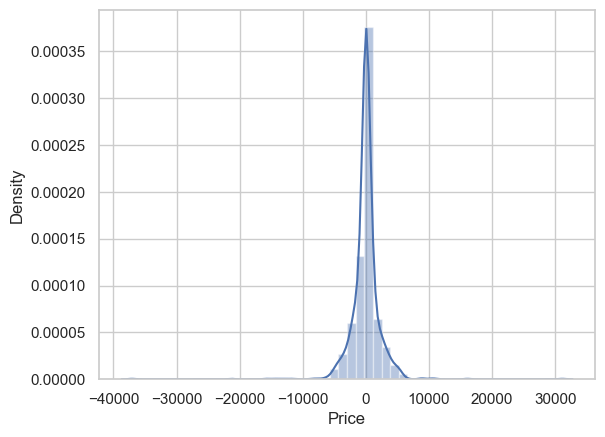

In [67]:
sns.distplot(rfr.predict(X_test) - y_test);

For the test dataset also, we are getting a **normal distribution curve** which means that our model **Random Forest Regressor** is performing correctly

#### Hyperparameter Tuning

In [68]:

rf_p = {
    
   "min_samples_split": list(range(2,9)),
    "min_samples_leaf" : list(range(1,8)),
    "max_depth":list(range(1,150)),
    "n_estimators": list(range(1,350))
}

xgb_p = {
    "learning_rate" : [0.1,0.2,0.01,0.02,0.04,0.05,0.06,0.07,0.09,0.5],
    "max_depth" : list(range(1,140)),
    "booster" : ['gbtree', 'gblinear' ,'dart'],
    "min_child_weight" : list(range(1,15)),
    "n_estimators" : list(range(1,130))
}

In [69]:
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [70]:
rscv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=10)

In [71]:
rscv.best_estimator_

RandomForestRegressor(max_depth=61, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=212)

In [72]:
rfr = RandomForestRegressor(max_depth=110, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=154)

In [73]:
rfr.fit(X_train , y_train)


RandomForestRegressor(max_depth=110, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=154)

In [74]:
rfr.score(X_train,y_train)

0.9189390295571448

In [75]:
rfr.score(X_test,y_test)

0.7907235967381288

In [76]:
xgb = XGBRegressor()

In [77]:
rscv = RandomizedSearchCV(xgb , param_distributions=xgb_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [78]:
rscv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'learning_rate': [0.1, 0.2, 0.01, 0.02,
                                                          0.04, 0.05, 0.06,
                                                          0.07, 0.09, 0.5],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=10)

In [79]:
rscv.best_estimator_

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.06, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=31, max_leaves=0, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=129, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.09, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=65, max_leaves=0, min_child_weight=7, 
             monotone_constraints='()', n_estimators=88, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)

In [81]:
xgb.fit(X_train , y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.09, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=65, max_leaves=0, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=88, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [82]:
xgb.score(X_test,y_test)

0.7896438821592735

In [83]:
y_pred = rfr.predict(X_test)

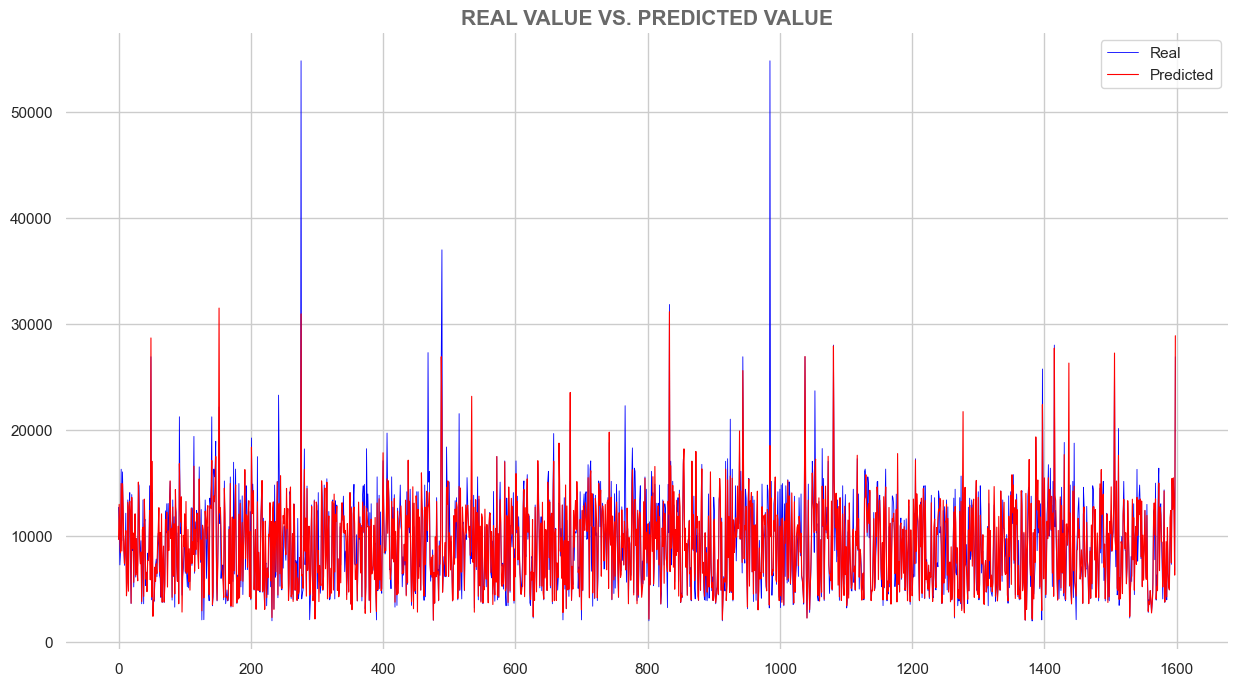

In [84]:
# Actual Value vs. Predicted Value

plt.figure(figsize=(15,8)) 
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, lw=0.6, color='blue', label='Real')
plt.plot(x_ax, y_pred, lw=0.8, color='red', label='Predicted')
sns.despine(bottom = True, left = True)
plt.title('REAL VALUE VS. PREDICTED VALUE', fontsize = 15, color ='dimgrey', fontweight = 'bold')
plt.legend()
plt.show()

Saving The Model In A Pickle File

In [85]:
file = open(r'D:\Flight-Price-Prediction\main_flight_rfr.pkl', "wb")
pickle.dump(rfr , file)

- **Conclusion** : Our model gives 95% accuracy on train data and 75% accuracy on test data before hyperparameter tunning and after that it gives 90% accuracy on train data and 80% accuracy on test data